In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("24BAD056")
print("kalvi kannan b")

24BAD056
kalvi kannan b


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print("Features:", iris.feature_names)
print("Classes:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Actual:", y_test[:10])
print("Predicted:", y_pred[:10])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Actual: [1 0 2 1 1 0 1 2 1 1]
Predicted: [1 0 2 1 1 0 1 2 1 1]


In [8]:
probs = gnb.predict_proba(X_test[:5])
print("Class probabilities (first 5 samples):")
print(probs)

Class probabilities (first 5 samples):
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]


In [9]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 1.0


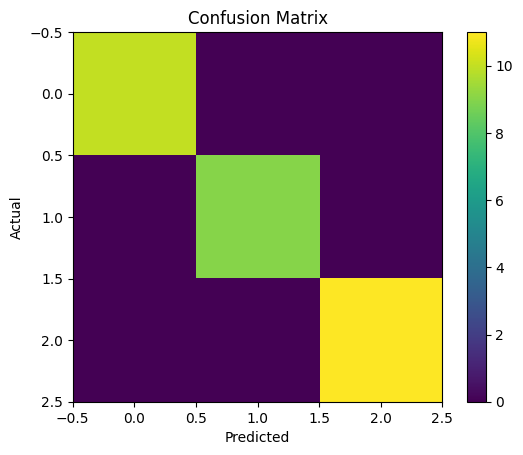

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

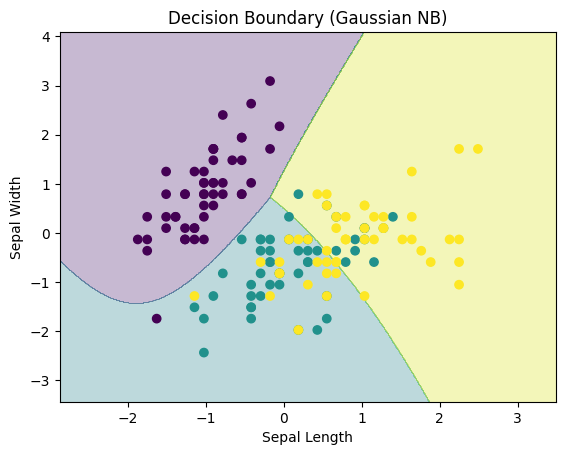

In [11]:
X2 = X[:, :2]   # Sepal length & width
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X2_train, y2_train)

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary (Gaussian NB)")
plt.show()